# CNN for MNIST Handwritten Digit Classification 

122010301036 Akash Chowdary Kodali 

Importing packages

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np

Data Preprocessing

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data() 

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
trainX, testX = trainX/255.0 , testX / 255.0

Building CNN model

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

Compiling model with required loss function and optimizer

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the model

In [11]:
model.fit(trainX, trainy, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1750 - accuracy: 0.9459
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0619 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0416 - accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0312 - accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0242 - accuracy: 0.9921


Techniques to prevent overfitting

In [13]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) 
model.fit(trainX, trainy, epochs=10, validation_data=(testX, testy), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0445 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0465 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0421 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.0547 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0673 - val_accuracy: 0.9845


Evaluating the model accuracy and loss

In [14]:
test_loss, test_accuracy = model.evaluate(testX, testy)
print(f"Model Accuracy: {test_accuracy}", f"\nModel Loss rate: {test_loss}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0673 - accuracy: 0.9845
Model Accuracy: 0.984499990940094 
Model Loss rate: 0.06728769838809967


In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis = 1)

print(classification_report(testy, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Plotting Training loss and Validation loss

In [23]:
import matplotlib.pyplot as plt

history = model.fit(trainX, trainy, epochs = 5, validation_data=(testX, testy))

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0669 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0693 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0688 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0705 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0679 - val_accuracy: 0.9863


In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss, val_loss)

[0.004945771303027868, 0.004217349458485842, 0.004858487285673618, 0.0038227809127420187, 0.0042931316420435905] [0.0668761134147644, 0.06925885379314423, 0.06877990812063217, 0.07051751017570496, 0.06789343804121017]


In [25]:
epochs = range(1, len(loss)+1)

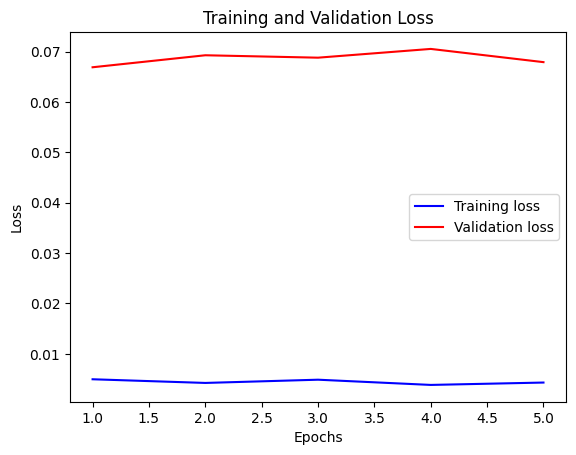

In [26]:
plt.figure()
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = "Validation loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()